In [1]:
%load_ext autoreload

In [181]:
%autoreload 2
%aimport sog1_helpers

import pandas as pd
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

#plt.rcParams['text.usetex'] = True

plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

# Plan

Phosophorylation
- Does phosphorylation affect activity?
- What is the order of importance of phosphosites?
- Are there any potential phosphosites that contribute to activity?
- Do different phosphosite sequences affect activity?


In [183]:
activity_col = "Activity_S3_1"

In [223]:
sog1_aa_features = pd.read_csv("../data/Sog1_AA_features.csv")
sog1_aa_features["PS"] = sog1_aa_features["PS_lib2"] == "confirmed"
sog1_aa_features = sog1_aa_features[["pos", "PS"]]
sog1_aa_features

,pos,PS
0,1,False
1,2,False
2,3,False
3,4,False
4,5,False
...,...,...
444,445,False
445,446,False
446,447,False
447,448,False


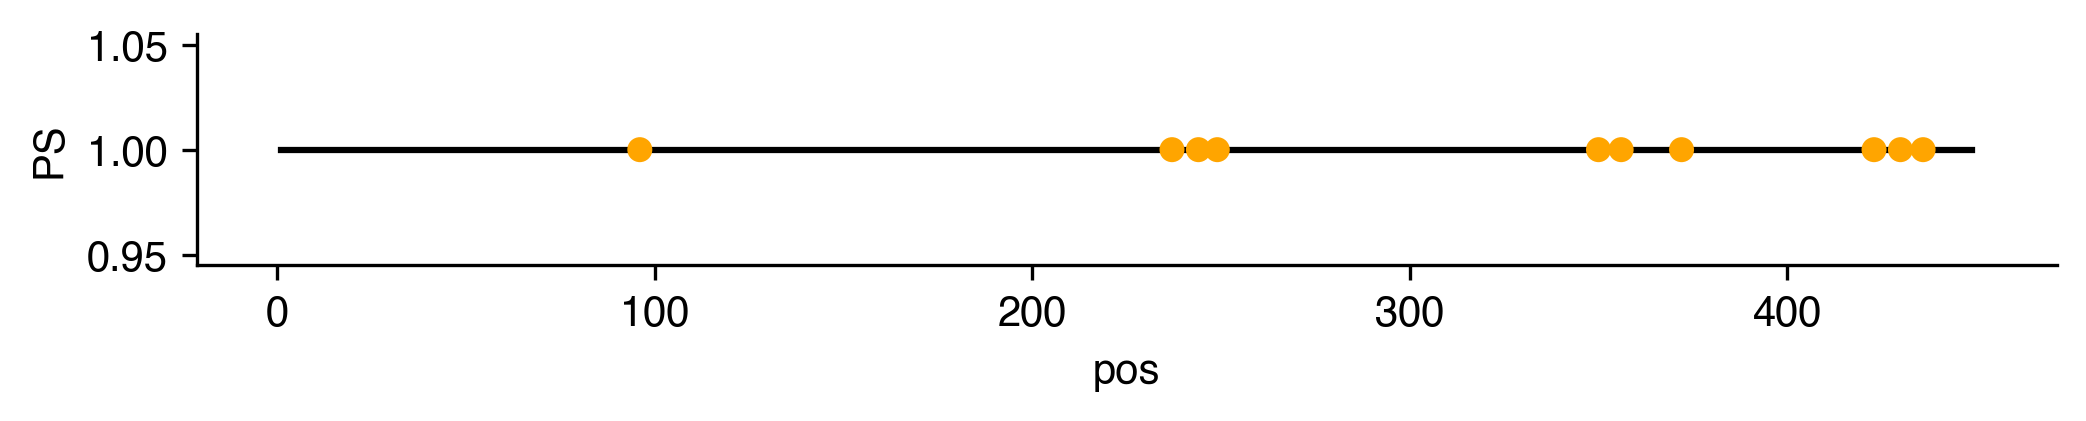

In [242]:
plt.figure(figsize = (8, 1), dpi = 300)
sns.lineplot(data = sog1_aa_features, x = "pos", y = 1, color = "black")
sns.scatterplot(data = sog1_aa_features[sog1_aa_features["PS"]], x = "pos", y = "PS", color = "orange", zorder = 10, edgecolor = "none")
sns.despine()

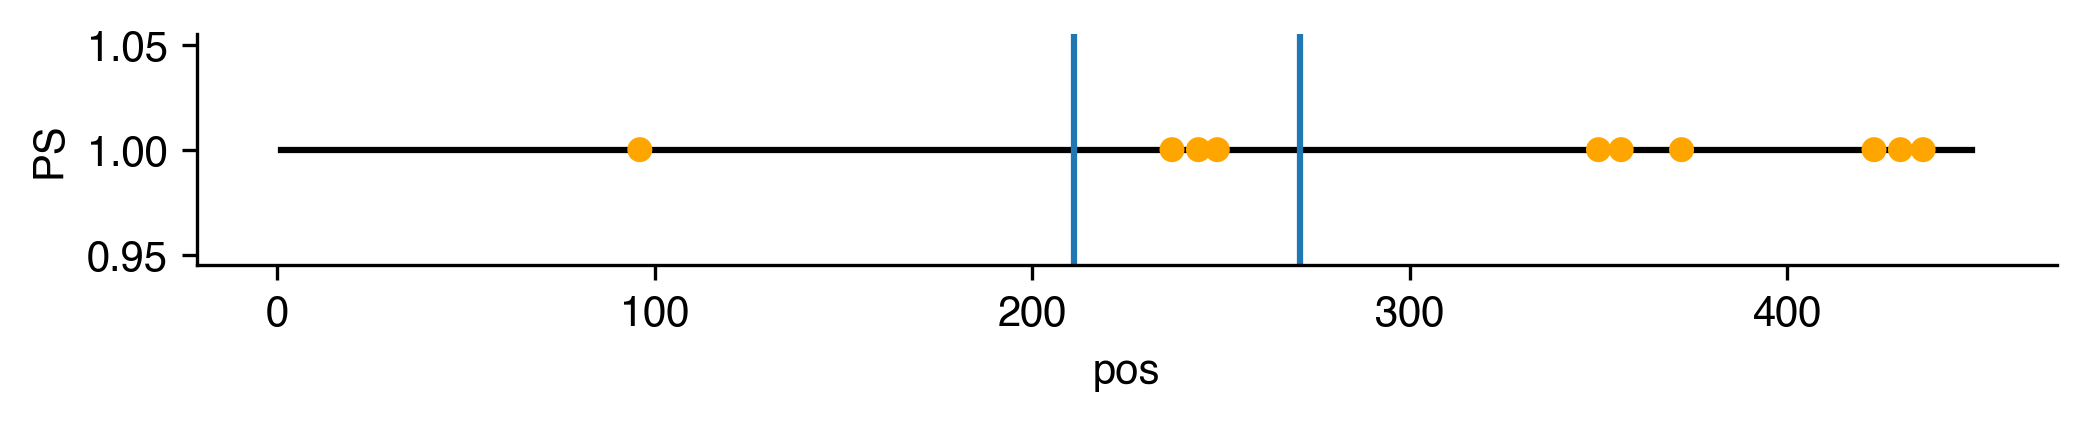

In [244]:
plt.figure(figsize = (8, 1), dpi = 300)
sns.lineplot(data = sog1_aa_features, x = "pos", y = 1, color = "black")
sns.scatterplot(data = sog1_aa_features[sog1_aa_features["PS"]], x = "pos", y = "PS", color = "orange", zorder = 10, edgecolor = "none")
plt.axvline(341)
plt.axvline(271)
sns.despine()

# 1. How do mutants & mimetics of all confirmed phosphosites affect activity?

In [184]:
# WT tiles
BasicArTh = sog1_helpers.return_activities("BasicArTh", pos_regex = r'\.(\d+)')
BasicArTh.head(3)

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,BasicArTh.1,Q6NQK2,1,21,41,MAGRSWLIDSNRIATKIMSASASSDPRQVVWKSNPSRHCP,349.798825,573.084946,461.441886
1,BasicArTh.2,Q6NQK2,11,31,51,NRIATKIMSASASSDPRQVVWKSNPSRHCPKCQHVIDNSD,470.700956,2417.845241,1444.273098
2,BasicArTh.3,Q6NQK2,21,41,61,SASSDPRQVVWKSNPSRHCPKCQHVIDNSDVVDDWPGLPR,867.654700,1328.781736,1098.218218


In [185]:
# Full confirmed phosphomutant tiles
PSv_conf2fA_STYA = sog1_helpers.return_activities("PSv_conf2fA_STYA")
PSv_conf2fA_STYA.head(3)

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,7_PSv_conf2fA_STYA,NaN,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPAVNQD,938.283433,835.266419,886.774926
1,8_PSv_conf2fA_STYA,NaN,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPAVNQDDGICYTHPKN,NaN,1959.887427,1959.887427
2,9_PSv_conf2fA_STYA,NaN,81,101,121,LSGLSSHPFIDEFIPAVNQDDGICYTHPKNLPGVKSDGTV,1858.333362,1904.584471,1881.458916


In [186]:
# Full confirmed phosphomimetic tiles
PSv_conf2fD = sog1_helpers.return_activities("PSv_conf2fD")
PSv_conf2fD = PSv_conf2fD[~PSv_conf2fD["Description"].str.contains("DD")]
PSv_conf2fD.head(3)

,Description,Other,Start,mid,End,tile,Activity_S3_1,Activity_S3_2,lib2_avg
0,7_PSv_conf2fD,/,61,81,101,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPDVNQD,842.685171,679.024328,760.854750
1,8_PSv_conf2fD,/,71,91,111,IIWHLLAKSGLSGLSSHPFIDEFIPDVNQDDGICYTHPKN,NaN,NaN,NaN
2,9_PSv_conf2fD,/,81,101,121,LSGLSSHPFIDEFIPDVNQDDGICYTHPKNLPGVKSDGTV,3467.363375,3673.033764,3570.198569


In [187]:
# Comparison to WT
PSv_conf2fA_STYA_vs_basic = sog1_helpers.add_all_var_positions(PSv_conf2fA_STYA, BasicArTh, activity_col)
PSv_conf2fD_vs_basic = sog1_helpers.add_all_var_positions(PSv_conf2fD, BasicArTh, activity_col)

In [188]:
phosphomut_positions = PSv_conf2fA_STYA_vs_basic.explode("vars")[["vars", activity_col + "_var"]].reset_index(drop = True)
phosphomim_positions = PSv_conf2fD_vs_basic.explode("vars")[["vars", activity_col + "_var"]].reset_index(drop = True)

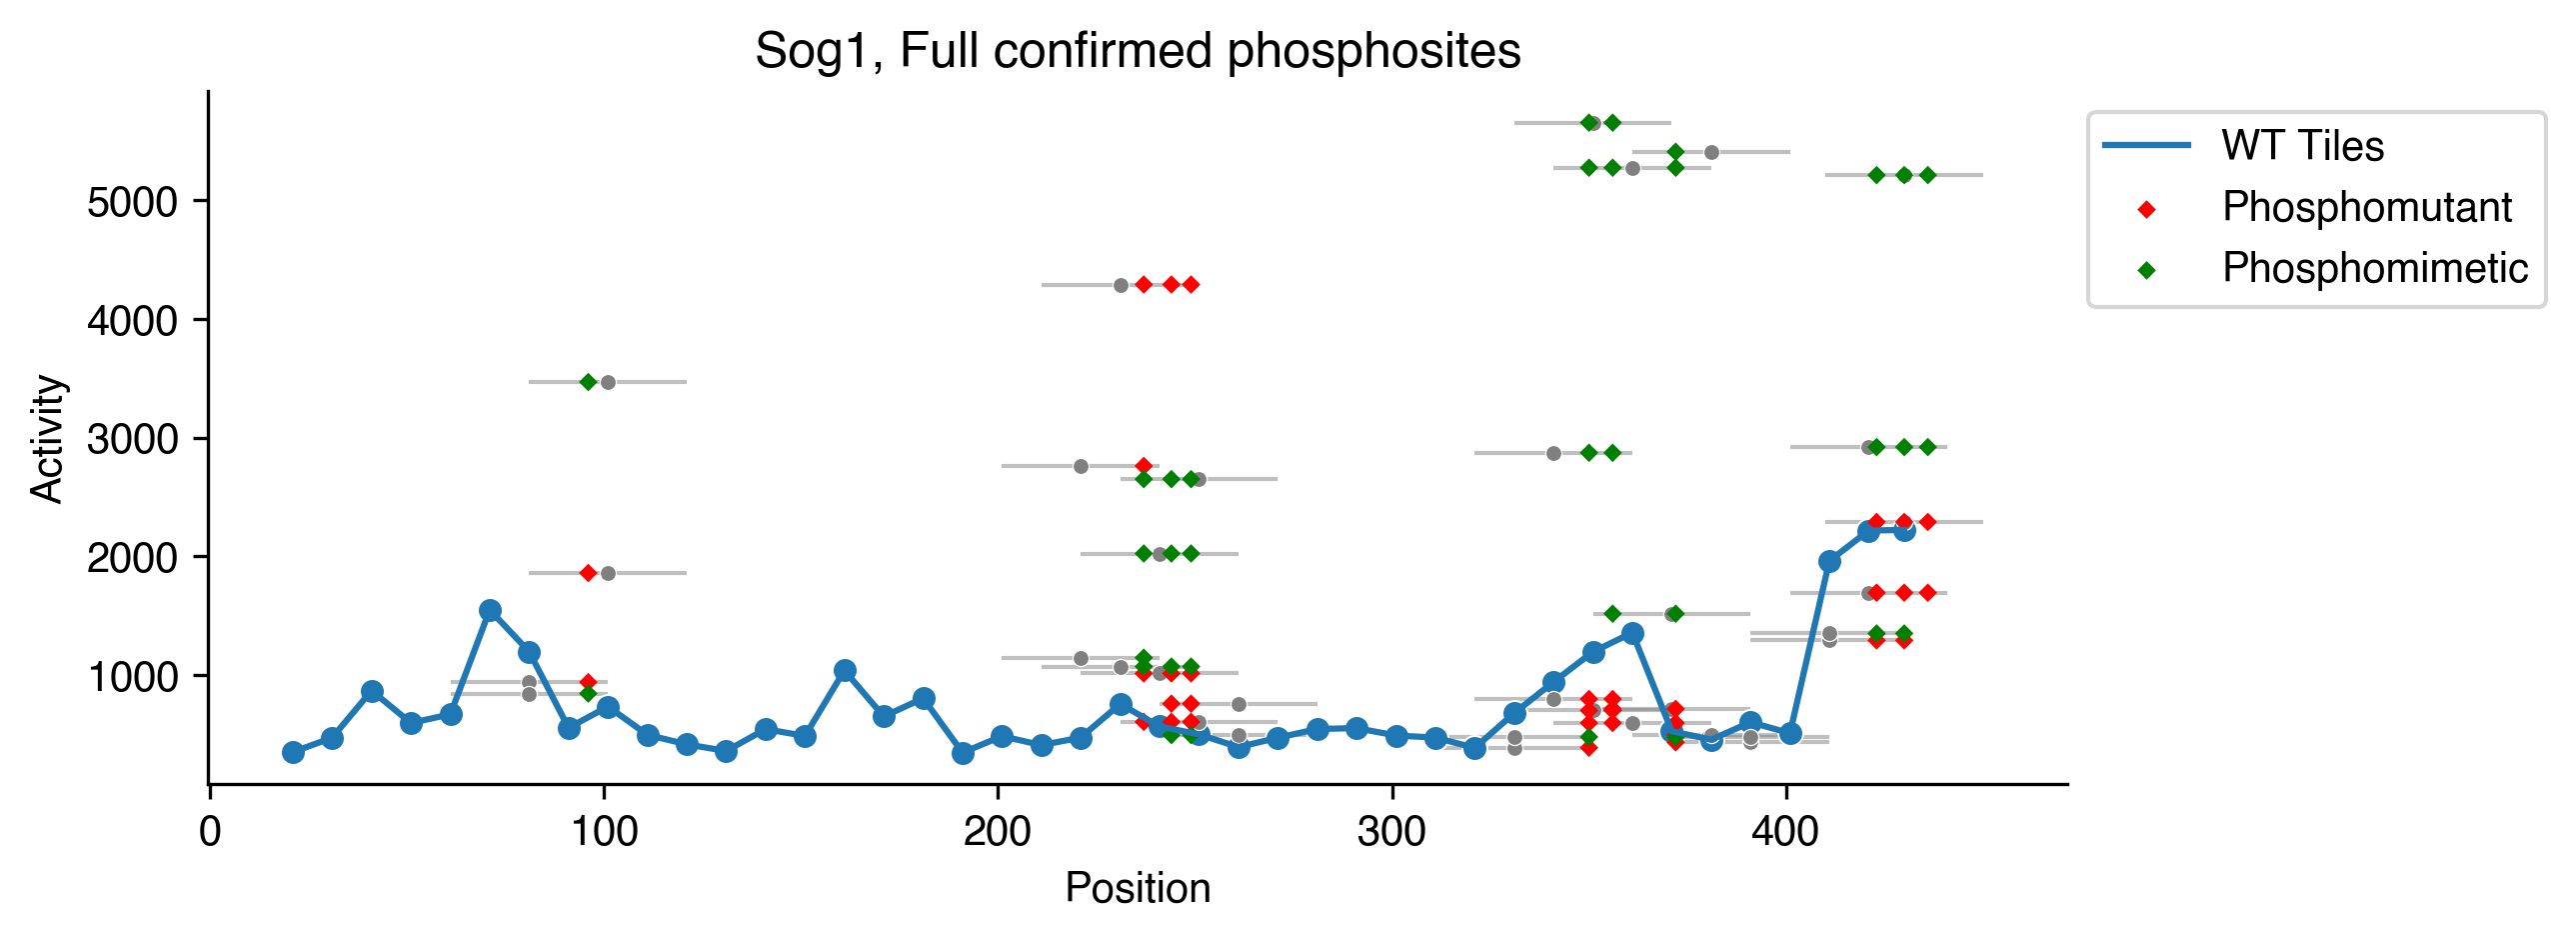

In [189]:
plt.figure(figsize = (8, 3), dpi = 300)
ax = sns.lineplot(data = BasicArTh, x = "mid", y = activity_col, label = "WT Tiles")
sns.scatterplot(data = BasicArTh, x = "mid", y = activity_col)

#sns.lineplot(data = PSv_conf2fA_STYA, x = "mid", y = activity_col, label = "Phosphomutant", color = "red")

#sns.lineplot(data = PSv_conf2fD, x = "mid", y = activity_col, label = "Phosphomimetic", color = "green")

sog1_helpers.plot_all_tiles(PSv_conf2fA_STYA, activity_col, ax=ax, color='gray', center = True)
sns.scatterplot(data = phosphomut_positions, x = "vars", y = activity_col + "_var", 
                ax = ax, color = "red", marker = "D", edgecolor = "none", s = 10, label = "Phosphomutant")

sog1_helpers.plot_all_tiles(PSv_conf2fD, activity_col, ax=ax, color='gray', center = True)
sns.scatterplot(data = phosphomim_positions, x = "vars", y = activity_col + "_var", 
                ax = ax, color = "green", marker = "D", edgecolor = "none", s = 10, label = "Phosphomimetic")

plt.title("Sog1, Full confirmed phosphosites")
plt.ylabel("Activity")
plt.xlabel("Position")
plt.legend(bbox_to_anchor = (1,1))
sns.despine()

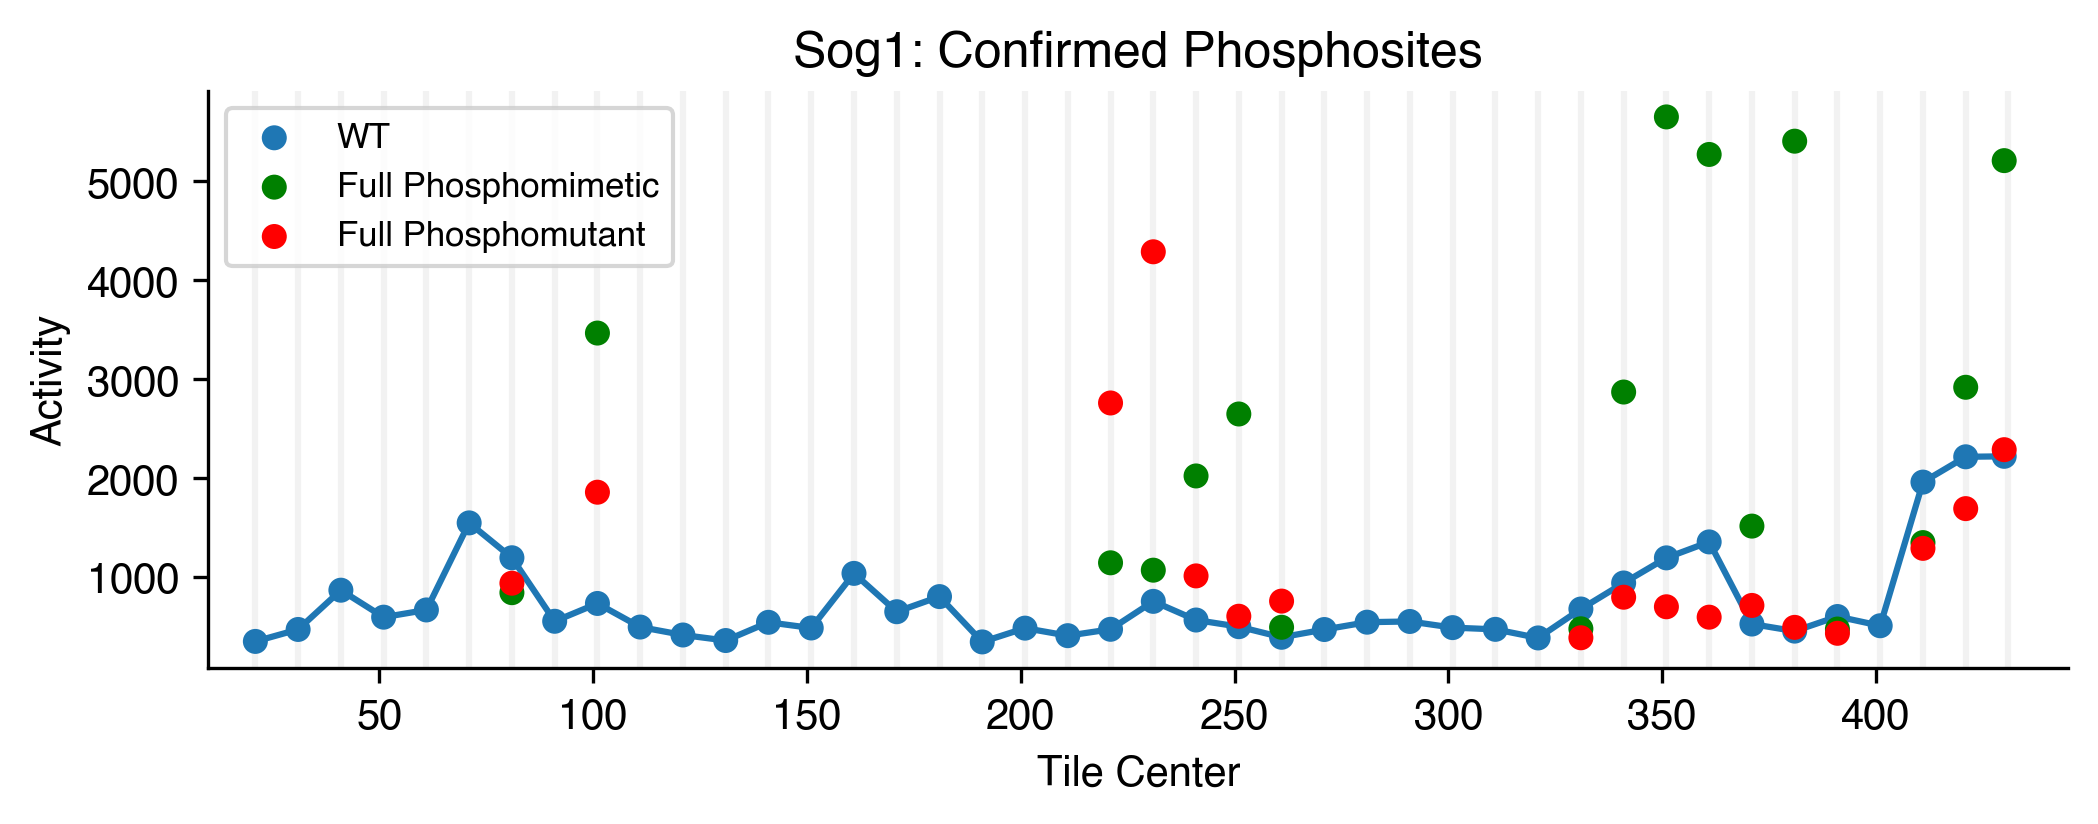

In [217]:
plt.figure(figsize = (8, 2.5), dpi = 300)
#plt.grid(zorder = 0)

for i in np.arange(21, 440, 10):
    plt.axvline(i, color = "gray", alpha = 0.1)

ax = sns.lineplot(data = BasicArTh, x = "mid", y = activity_col, zorder = 5)
sns.scatterplot(data = BasicArTh, x = "mid", y = activity_col, label = "WT", zorder = 5, edgecolor = "none")

#sns.lineplot(data = PSv_conf2fA_STYA, x = "mid", y = activity_col, label = "Phosphomutant", color = "red")

#sns.lineplot(data = PSv_conf2fD, x = "mid", y = activity_col, label = "Phosphomimetic", color = "green")

# sog1_helpers.plot_all_tiles(PSv_conf2fA_STYA, activity_col, ax=ax, color='gray', center = True)
# sns.scatterplot(data = phosphomut_positions, x = "vars", y = activity_col + "_var", 
#                 ax = ax, color = "red", marker = "D", edgecolor = "none", s = 10, label = "Phosphomutant")

# sog1_helpers.plot_all_tiles(PSv_conf2fD, activity_col, ax=ax, color='gray', center = True)
# sns.scatterplot(data = phosphomim_positions, x = "vars", y = activity_col + "_var", 
#                 ax = ax, color = "green", marker = "D", edgecolor = "none", s = 10, label = "Phosphomimetic")

sns.scatterplot(data = PSv_conf2fD, x = "mid", y = activity_col, label = "Full Phosphomimetic", color = "green", zorder = 10, edgecolor = "none")
sns.scatterplot(data = PSv_conf2fA_STYA, x = "mid", y = activity_col, label = "Full Phosphomutant", color = "red", zorder = 10, edgecolor = "none")

plt.xlim(10, 445)

plt.title("Sog1: Confirmed Phosphosites")
plt.ylabel("Activity")
plt.xlabel("Tile Center")
plt.legend(loc = "upper left", fontsize = "small")
sns.despine()

# 2. What is the order of importance of phosphosites?

## 2A. For each single confirmed phosphosite, how does WT vs STY-->A vs STY-->D activity compare?

### 